## Lab 5 Spectroscopic Constants  

In [1]:
import psi4
import numpy as np
import pylab

#### 1) The following code creates a diatomic molecule based on the two atomic symbols specified (e.g., HF), defines masses, and values of bond length in angstroms.

In [2]:
# Replace letters corresonding to different elements below:
mol_tmpl = """H 
F 1 **R**"""

m1 = 1   # mass (amu) of the first element 
m2 = 19  # mass (amu) of the second element 

rvals = np.array([i for i in range(20)])*0.002  # number of points & increment
rvals = rvals + 0.885                           # minimum bond length (angstroms) 

print(rvals)

[0.885 0.887 0.889 0.891 0.893 0.895 0.897 0.899 0.901 0.903 0.905 0.907
 0.909 0.911 0.913 0.915 0.917 0.919 0.921 0.923]


#### 2) The following code uses the PSI4 electronic structure program.  The psi4.geometry function creates the molecule and the psi4.energy function calculates the energy.  Use this plot to adjust the the values of rval above in order to best capture the potential minima. (Should appear relatively harmonic) 

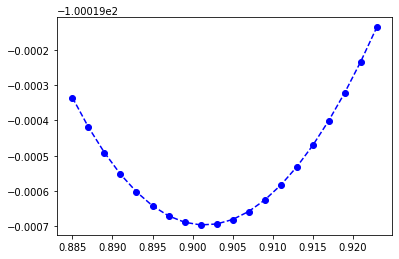

In [3]:
mols = [psi4.geometry(mol_tmpl.replace("**R**", str(r))) for r in rvals]
energies = [psi4.energy("SCF/cc-pVDZ", molecule=mol) for mol in mols]
pylab.plot(rvals, energies, linestyle='--', marker='o', color='b') #  Plots energies vs. R

#### 3) The next PSI4 function uses the bonds distances and the energies to derive the spectroscopic constants for the molecule. These are output to a python dictionary which is called data. The value corresponding to one of these constants can be used in a computation with the syntax: data['re']

In [ ]:
data = psi4.diatomic.anharmonicity(rvals, energies)

display(data)  # outputs a dictionary of computed constants for the molecule

print(data['re'])  # outputs the equilibrium bond length

#### 4) Using the calculated fundamental frequency, 'nu' (1/cm), calculate the force constant, k (N/m). 

#### 5) Calculate and plot the harmonic potential (J) corresponding to each bond length. (Note the minimum of the potential should be at 0.) 

#### 6) Using the calculated dissociation energy 'De' (units hartrees), calculate and plot the Morse potential (J) corresponding to each bond length. 

#### 7) Replace the red text in the first to lines with the variable names corresponding to your harmonic and Morse potentials.  The code will then convert to energies to hartrees and create a plot comparing the molecular energies with the two models.

In [ ]:
harmonic = "your variable"
morse = "your variable"

harmonic = harmonic/4.36E-18
morse = morse/4.36E-18

rmin=str(data['re'])
mols = [psi4.geometry(mol_tmpl.replace("**R**", rmin))]
zero = [psi4.energy("SCF/cc-pVDZ", molecule=mol) for mol in mols]

E = np.array(energies)-(zero)

pylab.plot(rvals, E, linestyle='--', marker='o', color='b')
pylab.plot(rvals, harmonic, linestyle='--', marker='o', color='g') 
pylab.plot(rvals, morse, linestyle='--', marker='o', color='r')
pylab.xlabel("R")
pylab.ylabel("E")
pylab.legend(['psi4', 'harmonic', 'morse'], loc='lower right')
pylab.ylim(0,data['De'])

#### 8)  Using the calculated values of the vibrational constant 'we' (1/cm) and the anharmonicity constant 'wexe' (1/cm) calculate the energy for the n=0 to n=3 vibrational energy levels with and without the anharmonic correction. 

#### 9) Calculate the $ \Delta E $ for n=0 to n=1, n=1 to n=2, and n=2 to n=3.  Compare the results with and without the anharmonic correction.